In [84]:
from PIL import Image
import os
import numpy as np

In [85]:
for name in os.listdir("/lfs/Nevils/files_256/real_lowSN/"):
    if name.endswith(".tiff"):
        img=Image.open("/lfs/Nevils/files_256/real_lowSN/"+name)
        img=np.asarray(img)/255
        img=img.astype("uint8")
        img=Image.fromarray(img)
        name=name.strip(".tiff")+".png"
        img.save("/lfs/Nevils/Unet/real_lowSN/"+name)

32400


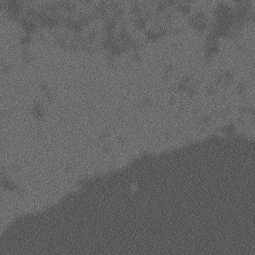

In [86]:
print(len(os.listdir("/lfs/Nevils/Unet/real_lowSN")))
Image.open("/lfs/Nevils/Unet/real_lowSN/Tile_r000_c000_C_1.png")

In [88]:
np.asarray(Image.open("/lfs/Nevils/Unet/real_lowSN/Tile_r000_c000_C_1.png"))

array([[ 93, 100, 105, ..., 119, 108, 109],
       [103, 104, 102, ..., 109, 114, 109],
       [101, 103, 102, ..., 103, 108, 102],
       ...,
       [ 89,  79,  85, ...,  88,  99,  89],
       [ 81,  95,  96, ...,  94,  89,  93],
       [ 85,  88,  89, ...,  85,  97,  99]], dtype=uint8)

DELETE AND RECREATE IMAGES DIRECTORY

In [89]:
save_list=os.listdir("/lfs/Nevils/Unet/inputs/art_noise/masks/0")
open_list=os.listdir("/lfs/Nevils/Unet/real_lowSN")
for i in range(16000):
    save_name=save_list[i]
    open_name=open_list[i]
    img=Image.open("/lfs/Nevils/Unet/real_lowSN/"+open_name)
    #img=img.resize((256,256))
    img.save("/lfs/Nevils/Unet/inputs/art_noise/images/"+save_name)

16000


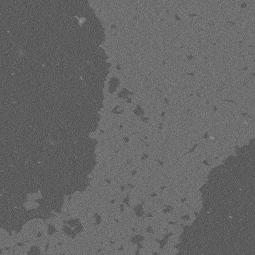

In [90]:
print(len(os.listdir("/lfs/Nevils/Unet/inputs/art_noise/images")))
Image.open("/lfs/Nevils/Unet/inputs/art_noise/images/Tile_r010_c000_2.png")

In [91]:
np.asarray(Image.open("/lfs/Nevils/Unet/inputs/art_noise/images/Tile_r018_c036_9.png"))

array([[118,  94, 110, ...,  99,  88,  90],
       [111, 109, 112, ...,  85,  94,  91],
       [106, 105, 100, ...,  82,  91,  94],
       ...,
       [111, 106, 105, ..., 119,  99, 110],
       [ 96, 110, 104, ..., 107, 112, 110],
       [112, 111, 108, ..., 106, 113, 116]], dtype=uint8)

Saving Results

In [112]:
for result in os.listdir("/lfs/Nevils/Unet/inputs/art_noise_NestedUNet_woDS/0"):
    index=save_list.index(result)
    final_name=open_list[index]
    img = Image.open("/lfs/Nevils/Unet/inputs/art_noise_NestedUNet_woDS/0/"+result)
    img=img.convert("1")
    img.save("/lfs/Nevils/Results/"+final_name)
    img.save("Results_256/"+final_name)

In [109]:
np.asarray(Image.open("/lfs/Nevils/Results/Tile_r000_c000_C_8.png"))

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

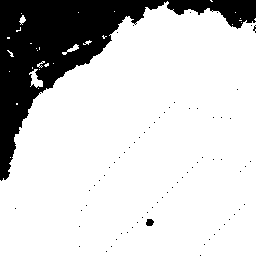

In [110]:
Image.open("/lfs/Nevils/Results/Tile_r000_c000_C_8.png")